In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import bMFThreshold, bMFPenalty
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


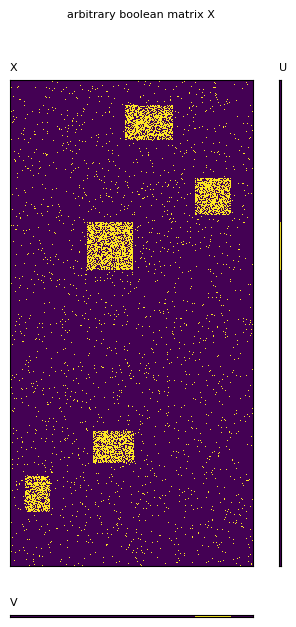

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [3]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Manually select tau
k and w are not effective here.

[I] k            : 5
[I] algorithm    : penalty
[I] reg          : 10
[I] reg_growth   : 3
[I] eps          : 0.01
[I] max_iter     : 100
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1702926467
[I] init         : random
[I] max_iter     : 2000
[W] Missing validation data.
[I] After initialization: max U: 2.146, max V: 0.950


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


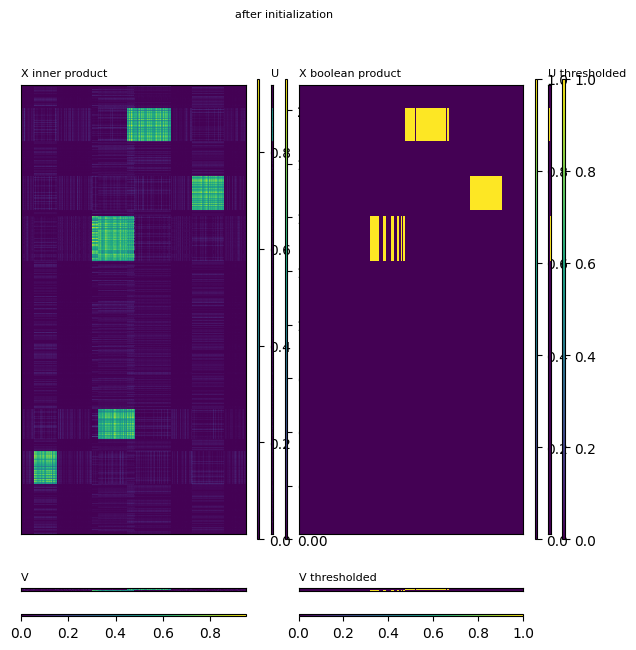

[I] After normalization: max U: 0.975, max V: 0.975


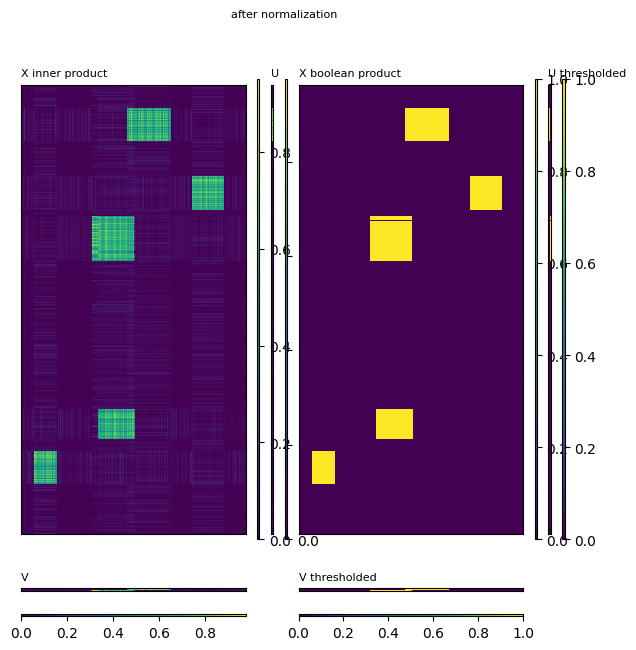

[I] iter: 0, reg: 1.0e+01, err: 33.721, rec_err: 16275.787, reg_err: 33.721
[I] iter: 1, reg: 3.0e+01, err: 31.477, rec_err: 16284.018, reg_err: 31.477
[I] iter: 2, reg: 9.0e+01, err: 28.311, rec_err: 16325.584, reg_err: 28.311
[I] iter: 3, reg: 2.7e+02, err: 23.843, rec_err: 16459.501, reg_err: 23.843
[I] iter: 4, reg: 8.1e+02, err: 18.966, rec_err: 16728.218, reg_err: 18.966
[I] iter: 5, reg: 2.4e+03, err: 14.327, rec_err: 17120.477, reg_err: 14.327
[I] iter: 6, reg: 7.3e+03, err: 10.341, rec_err: 17614.684, reg_err: 10.341
[I] iter: 7, reg: 2.2e+04, err: 7.226, rec_err: 18181.611, reg_err: 7.226
[I] iter: 8, reg: 6.6e+04, err: 4.932, rec_err: 18773.586, reg_err: 4.932
[I] iter: 9, reg: 2.0e+05, err: 3.304, rec_err: 19340.953, reg_err: 3.304


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


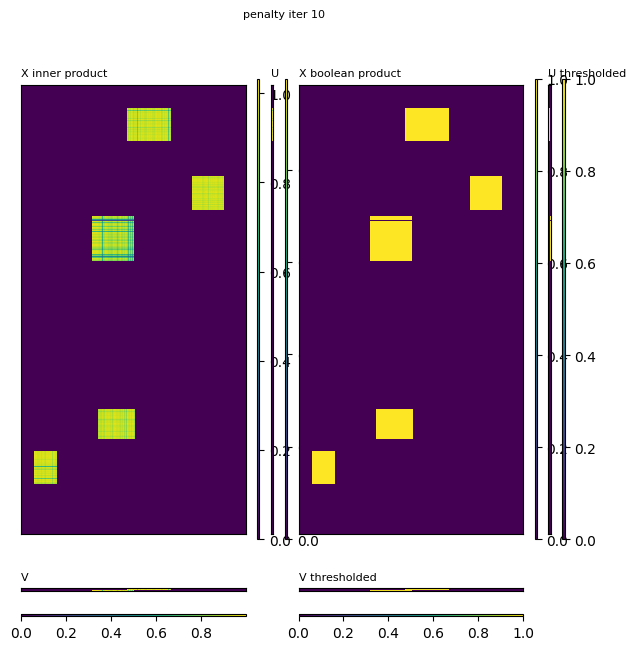

[I] iter: 10, reg: 5.9e+05, err: 2.171, rec_err: 19848.571, reg_err: 2.171
[I] iter: 11, reg: 1.8e+06, err: 1.388, rec_err: 20280.918, reg_err: 1.388
[I] iter: 12, reg: 5.3e+06, err: 0.860, rec_err: 20636.165, reg_err: 0.860
[I] iter: 13, reg: 1.6e+07, err: 0.539, rec_err: 20916.586, reg_err: 0.539
[I] iter: 14, reg: 4.8e+07, err: 0.357, rec_err: 21122.022, reg_err: 0.357
[I] iter: 15, reg: 1.4e+08, err: 0.248, rec_err: 21267.512, reg_err: 0.248
[I] iter: 16, reg: 4.3e+08, err: 0.180, rec_err: 21372.469, reg_err: 0.180
[I] iter: 17, reg: 1.3e+09, err: 0.135, rec_err: 21448.021, reg_err: 0.135
[I] iter: 18, reg: 3.9e+09, err: 0.103, rec_err: 21502.131, reg_err: 0.103
[I] iter: 19, reg: 1.2e+10, err: 0.079, rec_err: 21540.866, reg_err: 0.079


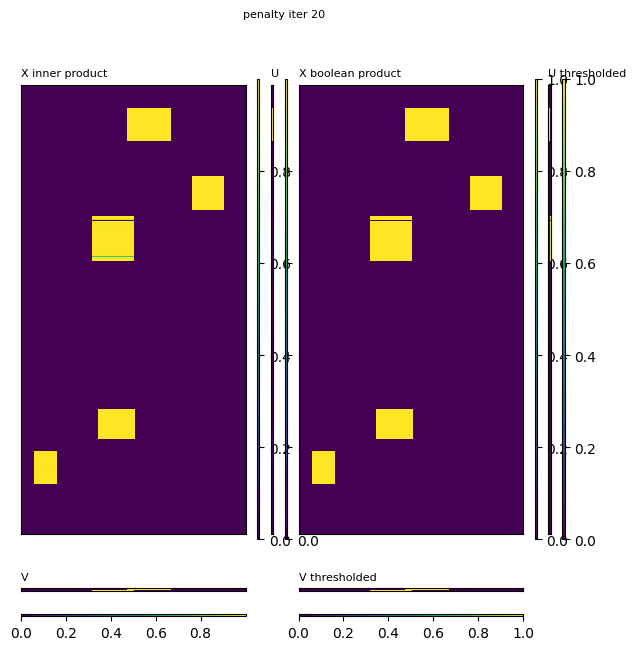

[I] iter: 20, reg: 3.5e+10, err: 0.060, rec_err: 21568.695, reg_err: 0.060
[I] iter: 21, reg: 1.0e+11, err: 0.044, rec_err: 21588.837, reg_err: 0.044
[I] iter: 22, reg: 3.1e+11, err: 0.031, rec_err: 21603.564, reg_err: 0.031
[I] iter: 23, reg: 9.4e+11, err: 0.020, rec_err: 21614.441, reg_err: 0.020
[I] iter: 24, reg: 2.8e+12, err: 0.013, rec_err: 21622.514, reg_err: 0.013
[I] iter: 25, reg: 8.5e+12, err: 0.007, rec_err: 21628.483, reg_err: 0.007
[W] Stopped in advance: Error lower than threshold


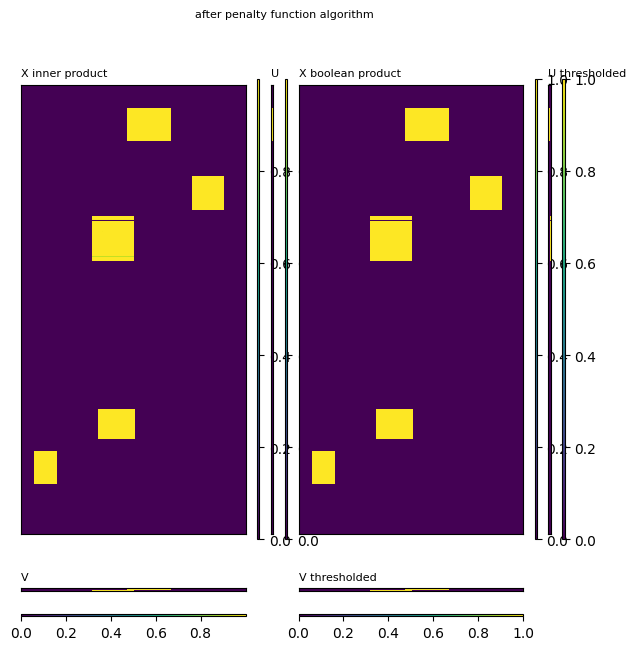

In [4]:
k = 5

bmf = bMFPenalty(k=k, reg_growth=3)
bmf.fit(X_train, display=True, scaling=0.5)

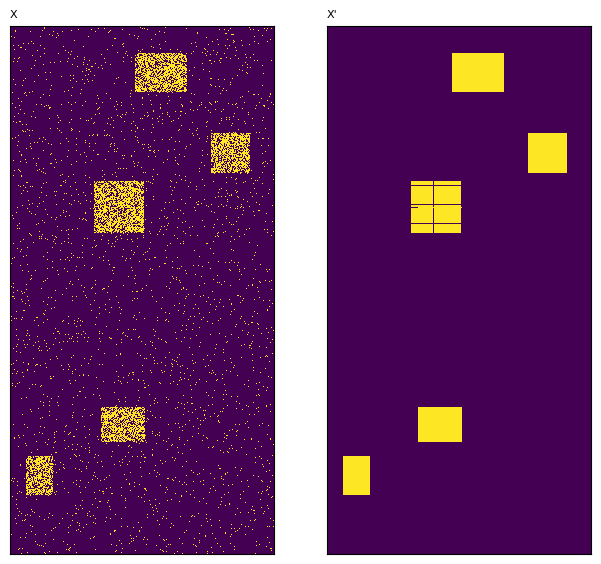

: 

In [5]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(bmf.U, bmf.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, scaling=0.5)